In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
premier_league = pd.read_csv('data/premier-league.csv')
bundesliga = pd.read_csv('data/1-bundesliga.csv')
ligue_1 = pd.read_csv('data/ligue-1.csv')
serie_a = pd.read_csv('data/serie-a.csv')
la_liga = pd.read_csv('data/primera-division.csv')

In [201]:
transfers = pd.concat([premier_league, bundesliga, ligue_1, serie_a, la_liga])

In [312]:
transfers_in = transfers[(transfers['fee_cleaned']>0)&(transfers['transfer_movement']=='in')&(transfers['year']>2013)]
transfers_out = transfers[(transfers['fee_cleaned']>0)&(transfers['transfer_movement']=='out')&(transfers['year']>2013)]

In [313]:
clubs = transfers_in[['club_name', 'league_name']]
clubs = clubs.drop_duplicates()

In [314]:
# List all columns in the DataFrames
columns = transfers_in.columns

# Exclude club_name, club_involved_name, and transfer_movement from matching
matching_columns = [col for col in columns if col not in ['club_name', 'league_name', 'country', 'club_involved_name', 'transfer_movement']]

# Merge the DataFrames on the matching columns
merged_df = pd.merge(
    transfers_in,
    transfers_out[matching_columns + ['club_name']],
    on=matching_columns,
    suffixes=('', '_out')
)

# Rename club_involved_name from transfers_out to club_from
merged_df.rename(columns={'club_name_out': 'club_from'}, inplace=True)

# Drop any duplicate or unnecessary columns if needed (optional)
final_df = merged_df
final_df


,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country,club_from
0,Arsenal FC,Alexis Sánchez,25.0,Centre-Forward,Barcelona,€42.50m,in,Summer,42.50,Premier League,2014,2014/2015,England,FC Barcelona
1,Arsenal FC,Calum Chambers,19.0,Centre-Back,Southampton,€20.23m,in,Summer,20.23,Premier League,2014,2014/2015,England,Southampton FC
2,Arsenal FC,Danny Welbeck,23.0,Centre-Forward,Man Utd,€20.00m,in,Summer,20.00,Premier League,2014,2014/2015,England,Manchester United
3,Arsenal FC,Mathieu Debuchy,28.0,Right-Back,Newcastle,€15.00m,in,Summer,15.00,Premier League,2014,2014/2015,England,Newcastle United
4,Arsenal FC,David Ospina,25.0,Goalkeeper,OGC Nice,€4.00m,in,Summer,4.00,Premier League,2014,2014/2015,England,OGC Nice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,Girona FC,Miguel Gutiérrez,21.0,Left-Back,Real Madrid,€4.00m,in,Summer,4.00,Primera Division,2022,2022/2023,Spain,Real Madrid
2654,Atlético de Madrid,Memphis Depay,28.0,Centre-Forward,Barcelona,€3.00m,in,Winter,3.00,Primera Division,2022,2022/2023,Spain,FC Barcelona
2655,Elche CF,Randy Nteka,25.0,Attacking Midfield,Rayo Vallecano,Loan fee:€200k,in,Winter,0.20,Primera Division,2022,2022/2023,Spain,Rayo Vallecano
2656,RCD Espanyol Barcelona,Fernando Pacheco,30.0,Goalkeeper,UD Almería,€2.20m,in,Winter,2.20,Primera Division,2022,2022/2023,Spain,UD Almería


In [315]:
league_map = {'Premier League': 0, '1 Bundesliga': 1, 'Ligue 1': 2, 'Serie A': 3, 'Primera Division': 4}
# clubs['league_number'] = league_map[clubs['league_name']]

In [324]:
nodes_list = []
for index, row in clubs.iterrows():
    # if row['club_involved_name'] in club_map.keys():
    #     club_from = club_map[row['club_involved_name']]
    # else:
    #     club_from = row['club_involved_name']
    # if club_from in unique_clubs:
        nodes_list.append((row['club_name'] , {'league': league_map[row['league_name']], 'league_name': row['league_name']}))
# nodes_list

In [317]:
edges_list = []
for index, row in final_df.iterrows():
    # if row['club_involved_name'] in club_map.keys():
    #     club_from = club_map[row['club_involved_name']]
    # else:
    #     club_from = row['club_involved_name']
    # if club_from in unique_clubs:
        edges_list.append((row['club_from'], row['club_name'] , int(row['fee_cleaned'])))

In [325]:
# list(set(final_df['club_name']))
G = nx.DiGraph()
G.clear()
G.add_nodes_from(nodes_list)
G.add_weighted_edges_from(edges_list)

In [268]:
"Author Network Max Degree: " + str(max(dict(G.degree()).values()))

'Author Network Max Degree: 22'

In [186]:
G.edges

OutEdgeView([('Manchester City', 'Everton FC'), ('Manchester City', 'Aston Villa'), ('Manchester City', 'Fulham FC'), ('Manchester City', 'Leeds United'), ('Manchester City', 'Arsenal FC'), ('Manchester City', 'Chelsea FC'), ('Manchester City', 'RB Leipzig'), ('Manchester City', 'Bayern Munich'), ('Manchester City', 'VfL Wolfsburg'), ('Manchester City', 'Borussia Mönchengladbach'), ('Manchester City', 'Juventus FC'), ('Manchester City', 'FC Barcelona'), ('Liverpool FC', 'AFC Bournemouth'), ('Liverpool FC', 'Southampton FC'), ('Liverpool FC', 'Nottingham Forest'), ('Liverpool FC', 'Hertha BSC'), ('Liverpool FC', '1.FSV Mainz 05'), ('Liverpool FC', '1.FC Union Berlin'), ('Liverpool FC', 'Bayern Munich'), ('Liverpool FC', 'Olympique Lyon'), ('Liverpool FC', 'AS Monaco'), ('Chelsea FC', 'Arsenal FC'), ('Chelsea FC', 'West Ham United'), ('Chelsea FC', 'Brighton & Hove Albion'), ('Chelsea FC', 'RB Leipzig'), ('Chelsea FC', 'AS Monaco'), ('Chelsea FC', 'Olympique Lyon'), ('Chelsea FC', 'Torin

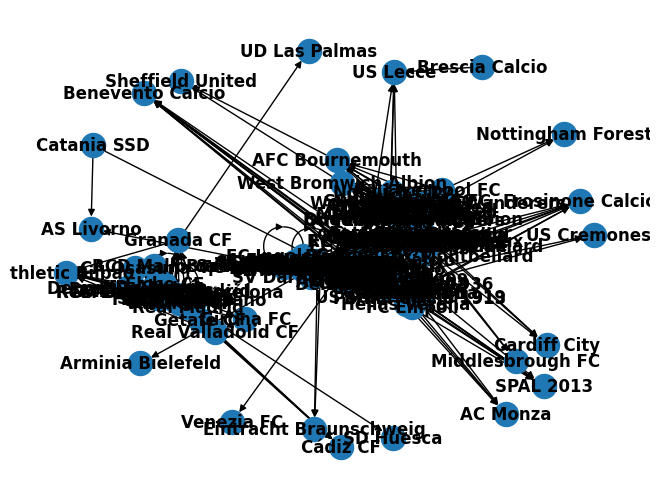

In [17]:
nx.draw(G, with_labels=True, font_weight='bold')

In [121]:
G.nodes()

NodeView(('Everton FC', 'Manchester United', 'Chelsea FC', 'Sunderland AFC', 'Liverpool FC', 'West Bromwich Albion', 'Manchester City', 'Swansea City', 'West Ham United', 'Tottenham Hotspur', 'Fulham FC', 'Aston Villa', 'Stoke City', 'Norwich City', 'Arsenal FC', 'Cardiff City', 'Hull City', 'Crystal Palace', 'Southampton FC', 'Newcastle United', 'Burnley FC', 'Queens Park Rangers', 'Leicester City', 'AFC Bournemouth', 'Watford FC', 'Middlesbrough FC', 'Huddersfield Town', 'Brighton & Hove Albion', 'Wolverhampton Wanderers', 'Sheffield United', 'Leeds United', 'Nottingham Forest', 'Borussia Dortmund', 'Bayern Munich', 'SV Werder Bremen', 'Hamburger SV', 'Bayer 04 Leverkusen', 'TSG 1899 Hoffenheim', '1.FSV Mainz 05', 'FC Schalke 04', 'VfL Wolfsburg', 'SC Freiburg', 'Eintracht Frankfurt', 'Hertha BSC', 'Borussia Mönchengladbach', 'Hannover 96', '1.FC Nuremberg', 'VfB Stuttgart', 'FC Augsburg', 'Eintracht Braunschweig', '1. FC Köln', 'SC Paderborn 07', 'FC Ingolstadt 04', 'SV Darmstadt 98

In [52]:
# Get the weights
weights = nx.get_edge_attributes(G, 'weight')
weights

{}

In [ ]:
# Get the weights
weights = nx.get_edge_attributes(G, 'weight')

# Normalize weights for thickness and color mapping
max_weight = max(weights.values())
edge_thickness = [2 + (5 * weights[edge] / max_weight) for edge in G.edges()]
edge_colors = [plt.cm.viridis(weights[edge] / max_weight) for edge in G.edges()]

# Draw the graph
pos = nx.circular_layout(G)  # Use a spring layout for better spacing
nx.draw(
    G, pos, with_labels=True, 
    node_size=700, node_color="lightblue", 
    # edge_color=edge_colors, 
    width=edge_thickness,
    arrowsize=20
)

In [134]:
leagues = nx.get_node_attributes(G, 'league')
leagues

{'Manchester United': 0,
 'Manchester City': 0,
 'Chelsea FC': 0,
 'Arsenal FC': 0,
 'Tottenham Hotspur': 0,
 'Everton FC': 0,
 'Liverpool FC': 0,
 'West Bromwich Albion': 0,
 'Swansea City': 0,
 'West Ham United': 0,
 'Norwich City': 0,
 'Fulham FC': 0,
 'Stoke City': 0,
 'Southampton FC': 0,
 'Aston Villa': 0,
 'Newcastle United': 0,
 'Sunderland AFC': 0,
 'Cardiff City': 0,
 'Hull City': 0,
 'Crystal Palace': 0,
 'Burnley FC': 0,
 'Leicester City': 0,
 'Queens Park Rangers': 0,
 'AFC Bournemouth': 0,
 'Watford FC': 0,
 'Middlesbrough FC': 0,
 'Brighton & Hove Albion': 0,
 'Huddersfield Town': 0,
 'Wolverhampton Wanderers': 0,
 'Sheffield United': 0,
 'Leeds United': 0,
 'Brentford FC': 0,
 'Nottingham Forest': 0,
 'Bayern Munich': 1,
 'Borussia Dortmund': 1,
 'Bayer 04 Leverkusen': 1,
 'FC Schalke 04': 1,
 'SC Freiburg': 1,
 'Eintracht Frankfurt': 1,
 'Hamburger SV': 1,
 'Borussia Mönchengladbach': 1,
 'Hannover 96': 1,
 '1.FC Nuremberg': 1,
 'VfL Wolfsburg': 1,
 'VfB Stuttgart': 1,

In [135]:
leagues = nx.get_node_attributes(G, 'league')

# Normalize weights for thickness and color mapping
# max_weight = max(weights.values())
# edge_thickness = [2 + (5 * weights[edge] / max_weight) for edge in G.edges()]
node_degrees = [degree for degree in dict(G.degree()).values()]
# edge_colors = [plt.cm.viridis(weights[edge] / max_weight) for edge in G.edges()]
node_colours = [leagues[node] for node in G.nodes()]


In [327]:
# Assuming G is your graph
nx.write_graphml(G, "graph.graphml")

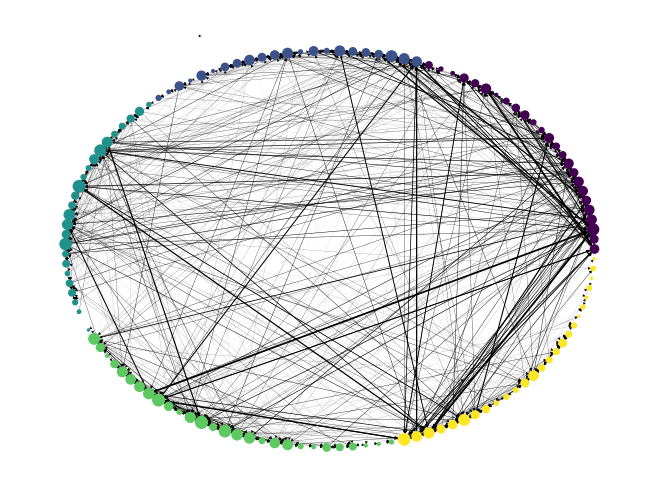

In [190]:
# Get the weights
weights = nx.get_edge_attributes(G, 'weight')
leagues = nx.get_node_attributes(G, 'league')

# Normalize weights for thickness and color mapping
# max_weight = max(weights.values())
edge_thickness = [(2* weights[edge] / max_weight) for edge in G.edges()]
node_degrees = [2*degree for degree in dict(G.degree()).values()]
# edge_colors = [plt.cm.viridis(weights[edge] / max_weight) for edge in G.edges()]
node_colours = [plt.cm.viridis(leagues[node] / 4) for node in G.nodes()]

# Draw the graph
pos = nx.circular_layout(G)  # Use a spring layout for better spacing
nx.draw(
    G, pos, with_labels=False, 
    node_size=node_degrees, node_color=node_colours, 
    # edge_color=edge_colors, 
    width=edge_thickness,
    arrowsize=5
)

In [301]:
from matplotlib.cm import get_cmap

/var/folders/x_/6zg2_3js06g4d9_tbv083qdm0000gp/T/ipykernel_13640/1142635123.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab20', len(unique_leagues_updated))


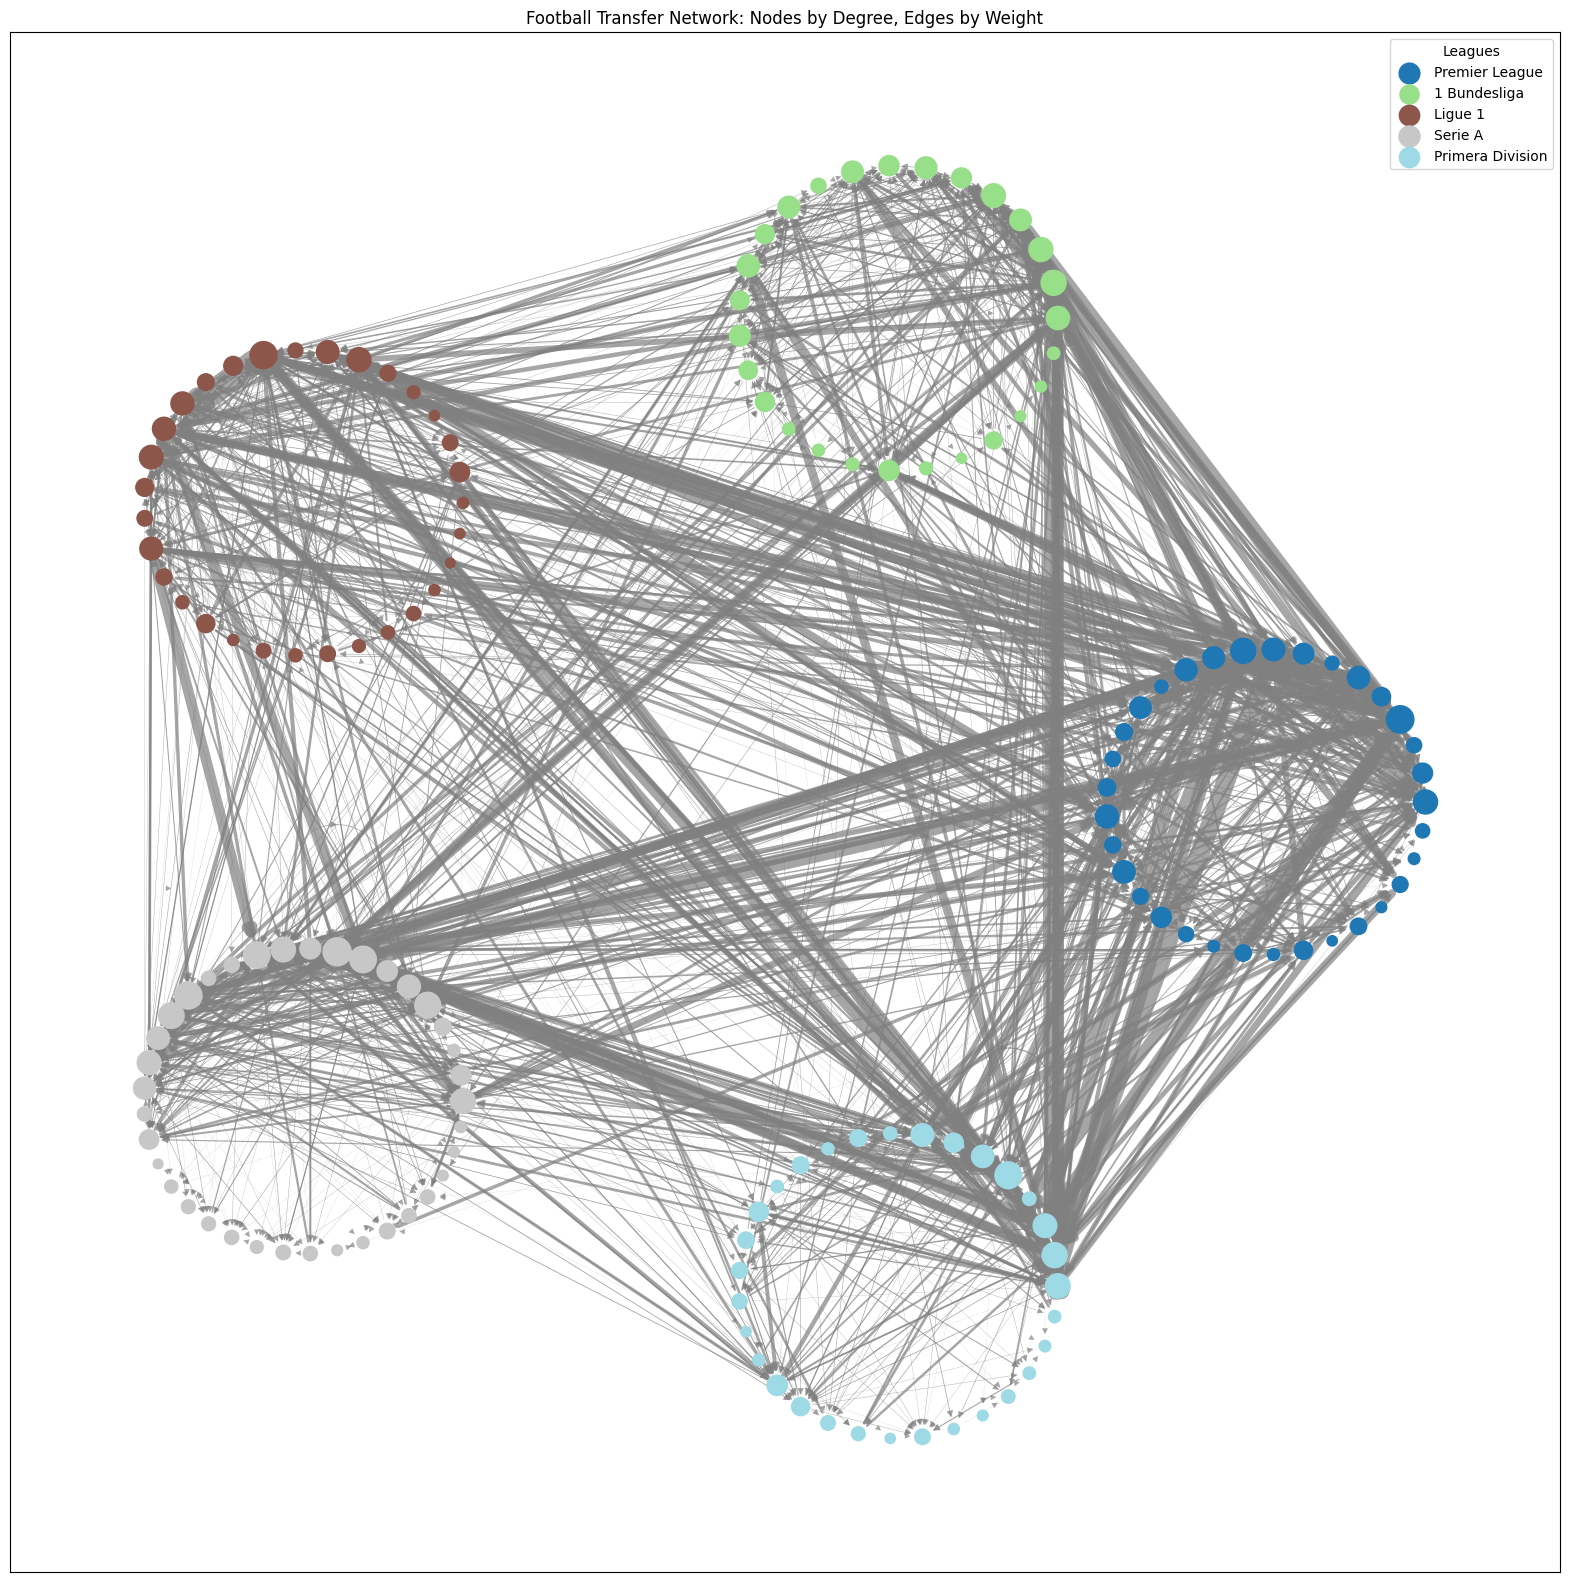

In [328]:
graph_updated = G

# Group nodes by their updated league_name attribute
league_groups_updated = {}
for node in graph_updated.nodes():
    league_name = graph_updated.nodes[node].get('league_name', 'Unknown')
    if league_name not in league_groups_updated:
        league_groups_updated[league_name] = []
    league_groups_updated[league_name].append(node)

# Generate distinct colors for each league group
unique_leagues_updated = list(league_groups_updated.keys())
cmap = get_cmap('tab20', len(unique_leagues_updated))
league_colors_updated = {league: cmap(i) for i, league in enumerate(unique_leagues_updated)}

# Number of leagues to arrange in a larger circle
num_leagues_updated = len(league_groups_updated)
radius = 5  # Radius for the large circle of leagues

# Calculate positions for league centers on a large circle
league_centers_updated = {
    league: (
        radius * np.cos(2 * np.pi * i / num_leagues_updated),
        radius * np.sin(2 * np.pi * i / num_leagues_updated),
    )
    for i, league in enumerate(league_groups_updated.keys())
}

# Initialize position dictionary
pos_updated = {}

# Arrange each league's nodes in a smaller circle around its league center
small_circle_radius = 1.5  # Radius for the small circle for each league
for league, center in league_centers_updated.items():
    nodes = league_groups_updated[league]
    angle_step = 2 * np.pi / len(nodes) if nodes else 0
    for j, node in enumerate(nodes):
        angle = j * angle_step
        pos_updated[node] = (
            center[0] + small_circle_radius * np.cos(angle),
            center[1] + small_circle_radius * np.sin(angle),
        )

# Extract edge weights for visualization
edge_weights_updated = [graph_updated[u][v]['weight'] for u, v in graph_updated.edges()]

# Node sizes by degree (scaled for better visualization)
node_sizes = [50 + 5 * graph_updated.degree(node) for node in graph_updated.nodes()]

# Visualize the graph with updated attributes
plt.figure(figsize=(20, 20))

# Draw nodes, color-coded by league group and sized by degree
for league, nodes in league_groups_updated.items():
    nx.draw_networkx_nodes(
        graph_updated,
        pos_updated,
        nodelist=nodes,
        node_size=[node_sizes[list(graph_updated.nodes).index(node)] for node in nodes],
        node_color=[league_colors_updated[league]],
        label=league,
    )

# Draw edges with thickness proportional to weight
nx.draw_networkx_edges(
    graph_updated,
    pos_updated,
    width=[0.1 * w for w in edge_weights_updated],  # Scaled thickness
    alpha=0.7,
    edge_color='gray',
)

# Add legend for league groups with actual league names
plt.legend(scatterpoints=1, loc="upper right", fontsize=10, title="Leagues")

plt.title("Football Transfer Network: Nodes by Degree, Edges by Weight")
plt.show()


In [323]:
nx.get_node_attributes(G, 'league_name')

{}

In [238]:
final_df[final_df['club_from']=='Chelsea FC']

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country,club_from
12,West Ham United,Kurt Zouma,26.0,Centre-Back,Chelsea,€35.00m,in,Summer,35.0,Premier League,2021,2021/2022,England,Chelsea FC
20,Brighton & Hove Albion,Billy Gilmour,21.0,Central Midfield,Chelsea,€10.40m,in,Summer,10.4,Premier League,2022,2022/2023,England,Chelsea FC
38,West Ham United,Emerson,28.0,Left-Back,Chelsea,€15.40m,in,Summer,15.4,Premier League,2022,2022/2023,England,Chelsea FC
40,Arsenal FC,Jorginho,31.0,Defensive Midfield,Chelsea,€11.30m,in,Winter,11.3,Premier League,2022,2022/2023,England,Chelsea FC


In [195]:
def compute_network_metrics(graph):
    # graph = graph.subgraph(max(nx.connected_components(graph)))
    print(f"Giant Component Size: {round(graph.number_of_nodes(), 2)}")
    print(f"Avg Clustering Coefficient: {round(nx.algorithms.average_clustering(graph), 2)}")
    print(f"Assortative Coefficient: {round(nx.algorithms.degree_assortativity_coefficient(graph), 2)}")
    # print(f"Avg Shortest Path Length: {round(nx.average_shortest_path_length(graph), 2)}")

In [196]:
compute_network_metrics(G)

Giant Component Size: 20
Avg Clustering Coefficient: 0.09
Assortative Coefficient: 0.15


Text(0.5, 1.0, 'log-log scale')

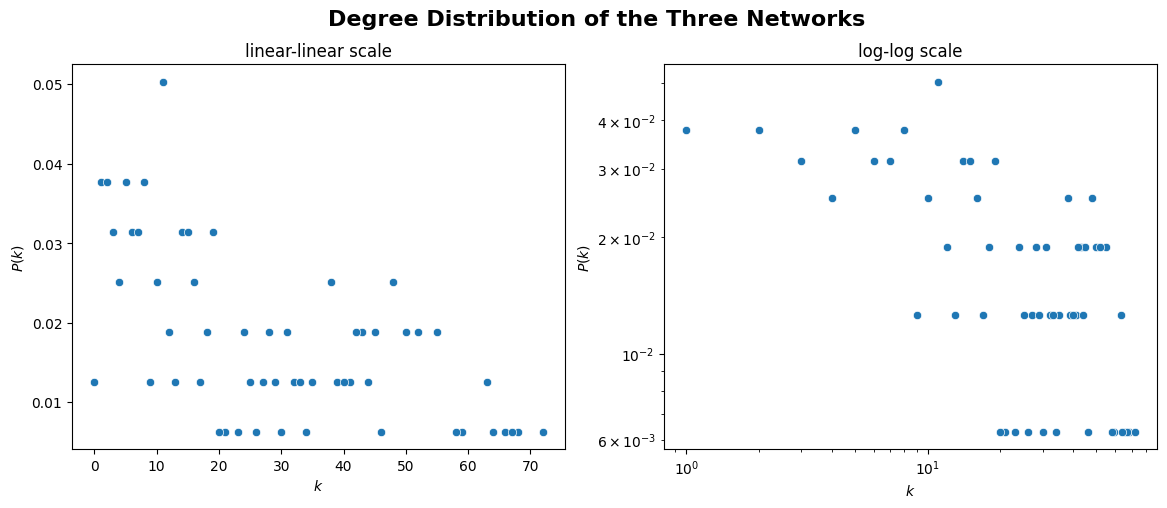

In [213]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
degrees = np.array([d for _, d in G.degree])
x, y = zip(*Counter(degrees).items())
x = np.array(x)
y = np.array(y) / G.number_of_nodes()
sns.scatterplot(x=x, y=y, ax=ax[0])
sns.scatterplot(x=x, y=y, ax=ax[1])

fig.suptitle('Degree Distribution of the Three Networks',
             fontweight='bold', fontsize=16, y=0.99)

ax[0].set_xlabel('$k$')
ax[0].set_ylabel('$P(k)$')
ax[0].set_title('linear-linear scale')

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('$k$')
ax[1].set_ylabel('$P(k)$')
ax[1].set_title('log-log scale')

In [216]:
def rich_club_coefficient_rank(graph):
    ranks = [n for n, _ in sorted(graph.degree, key=lambda x: -x[1])]
    max_rank = len(ranks)
    coefficients = {}
    for rank in range(2, max_rank+1):
        rank_subgraph = graph.subgraph(ranks[:rank])
        coefficients[rank] = rank_subgraph.number_of_edges()*2/rank/(rank-1)
    return coefficients

rich_club_coefficient_rank(G)

{2: 3.0,
 3: 2.3333333333333335,
 4: 1.5,
 5: 1.4,
 6: 1.4666666666666666,
 7: 1.3809523809523812,
 8: 1.3214285714285714,
 9: 1.3888888888888888,
 10: 1.3111111111111111,
 11: 1.1818181818181819,
 12: 1.1666666666666667,
 13: 1.1923076923076923,
 14: 1.1538461538461537,
 15: 1.1428571428571428,
 16: 1.1083333333333334,
 17: 1.0514705882352942,
 18: 1.0130718954248366,
 19: 0.9766081871345028,
 20: 0.9210526315789473,
 21: 0.9476190476190476,
 22: 0.9523809523809523,
 23: 0.9486166007905138,
 24: 0.9202898550724639,
 25: 0.8866666666666667,
 26: 0.8923076923076922,
 27: 0.8803418803418803,
 28: 0.8624338624338624,
 29: 0.8472906403940887,
 30: 0.8367816091954022,
 31: 0.832258064516129,
 32: 0.8104838709677419,
 33: 0.8068181818181818,
 34: 0.8003565062388591,
 35: 0.7899159663865546,
 36: 0.7761904761904762,
 37: 0.7627627627627628,
 38: 0.7467994310099574,
 39: 0.7435897435897436,
 40: 0.7243589743589743,
 41: 0.7134146341463414,
 42: 0.70267131242741,
 43: 0.6877076411960134,
 44: 0

In [269]:
betweenness = pd.DataFrame(nx.betweenness_centrality(G).keys(), nx.betweenness_centrality(G).values())
betweenness.sort_index(ascending=False).head(20)

,0
0.103856,Chelsea FC
0.065631,Atalanta BC
0.062880,AS Roma
0.053910,SSC Napoli
0.051518,RB Leipzig
0.049812,Stade Rennais FC
0.043394,AS Monaco
0.042802,Tottenham Hotspur
0.041806,Aston Villa
0.039712,Inter Milan


In [270]:
in_degrees = pd.DataFrame(nx.in_degree_centrality(G).keys(), nx.in_degree_centrality(G).values())
in_degrees.sort_index(ascending=False).head(20)

,0
0.100000,Chelsea FC
0.100000,OGC Nice
0.090909,US Salernitana 1919
0.081818,Aston Villa
0.081818,Tottenham Hotspur
0.081818,Newcastle United
0.081818,Nottingham Forest
0.072727,Olympique Marseille
0.072727,SSC Napoli
0.072727,AS Roma


In [271]:
out_degrees = pd.DataFrame(nx.out_degree_centrality(G).keys(), nx.out_degree_centrality(G).values())
out_degrees.sort_index(ascending=False).head(20)

,0
0.109091,LOSC Lille
0.100000,RB Leipzig
0.100000,Olympique Lyon
0.100000,1.FC Union Berlin
0.100000,AS Roma
0.100000,Chelsea FC
0.090909,FC Barcelona
0.090909,AS Monaco
0.090909,Atalanta BC
0.090909,VfB Stuttgart


In [204]:
dict(G.in_degree())

{'Brighton & Hove Albion': 1,
 'Arsenal FC': 3,
 'Watford FC': 1,
 'Crystal Palace': 1,
 'Manchester United': 2,
 'Leeds United': 2,
 'Manchester City': 2,
 'Aston Villa': 2,
 'Newcastle United': 5,
 'Burnley FC': 0,
 'Norwich City': 1,
 'Tottenham Hotspur': 2,
 'Chelsea FC': 4,
 'West Ham United': 4,
 'Everton FC': 2,
 'Wolverhampton Wanderers': 2,
 'Leicester City': 0,
 'Fulham FC': 3,
 'Liverpool FC': 1,
 'Nottingham Forest': 3}